In [1]:
# データ分析・操作用ライブラリ
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import itertools


# NLP用ライブラリ
import MeCab,re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# 形態素解析用関数
def tokenize(text):
    tokens = []
    tagger = MeCab.Tagger( "-Ochasen" )
    node = tagger.parseToNode(text)
    while node:
        if node.feature.split(",")[0] == "名詞":
                replace_node = re.sub( re.compile( "[!-/:-@[-`{-~]" ), "", node.surface )
                if replace_node != "" and replace_node != " ":
                    tokens.append(replace_node)
        node = node.next
    return tokens

In [3]:
# CSVの読み込み
wikiData = pd.read_csv("csv/train.csv", encoding="utf-8")

# 読み込みデータの表示
wikiData.head()

,text,target
0,ドール・フード・カンパニー ドール・フード・カンパニー（Dole Food Compan...,1
1,南ヶ丘牧場 株式会社 南ヶ丘牧場（みなみがおかぼくじょう）は、栃木県那須高原に本拠を置く...,1
2,岩瀬牧場 岩瀬牧場（いわせぼくじょう）は、日本の福島県岩瀬郡鏡石町にある牧場である。 ...,1
3,"クラギ クラギ株式会社（くらぎ、""KURAGI Co.Ltd."" ）は、三重県を中心に「...",1
4,"ハッピーネモファーム 株式会社ハッピーネモファーム（""""）は、北海道浦河郡浦河町にある競...",1


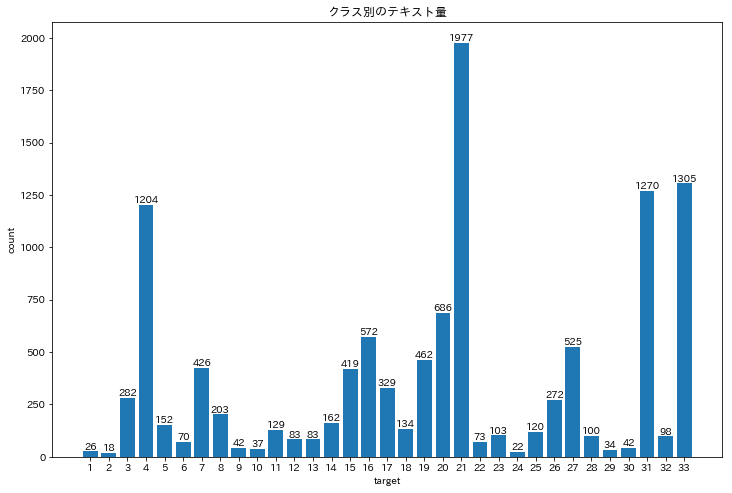

In [4]:
# クラス別のテキスト量を確認
wiki_gpby = wikiData.groupby('target').count()
y = wiki_gpby['text'].values
x =wiki_gpby.index.values

plt.figure(figsize=(12, 8))
plt.title("クラス別のテキスト量")
plt.xlabel("target")   
plt.ylabel("count")
plt.xticks(x)
plt.bar(x, y)

# 棒グラフ内に数値を書く
for x, y in zip(x, y):
    plt.text(x, y, y, ha='center', va='bottom')
    
plt.show()